In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# load the movie dataset
movies = pd.read_csv('/content/Tamil_movies_dataset.csv')

movies.head(5)

,MovieName,Genre,Rating,Director,Actor,PeopleVote,Year,Hero_Rating,movie_rating,content_rating
0,Mouna Guru,Action,7.7,Santha Kumar,Arulnithi,746,2011,8,8,7.900000
1,7 Aum Arivu,Action,6.2,A.R. Murugadoss,Suriya,9479,2011,9,9,8.066667
2,Vaagai Sooda Vaa,Comedy,8.0,A. Sarkunam,Vimal,14522,2011,8,7,7.666667
3,Mankatha,Action,7.6,Venkat Prabhu,Ajith Kumar,12276,2011,6,8,7.200000
4,Kanchana: Muni 2,Comedy,6.5,Lawrence Raghavendra,Lawrence Raghavendra,1044,2011,8,9,7.833333


In [ ]:
movies.isnull().sum()
#the movie dataset don't have null values so no data preprocessing steaps will be needed

MovieName         0
Genre             0
Rating            0
Director          0
Actor             0
PeopleVote        0
Year              0
Hero_Rating       0
movie_rating      0
content_rating    0
dtype: int64

In [ ]:
data_rate = movies[['MovieName','Genre','PeopleVote','movie_rating']]
data_rate

,MovieName,Genre,PeopleVote,movie_rating
0,Mouna Guru,Action,746,8
1,7 Aum Arivu,Action,9479,9
2,Vaagai Sooda Vaa,Comedy,14522,7
3,Mankatha,Action,12276,8
4,Kanchana: Muni 2,Comedy,1044,9
...,...,...,...,...
324,Dhilluku Dhuddu 2,Comedy,497,9
325,Dev,Action,724,8
326,Charlie Chaplin 2,Comedy,215,7
327,Petta,Action,7545,8


In [ ]:
data_rate.describe()

,PeopleVote,movie_rating
count,329.000000,329.000000
mean,7372.607903,8.139818
std,14380.829757,0.760232
min,7.000000,6.000000
25%,455.000000,8.000000
50%,1320.000000,8.000000
75%,5907.000000,9.000000
max,71418.000000,10.000000


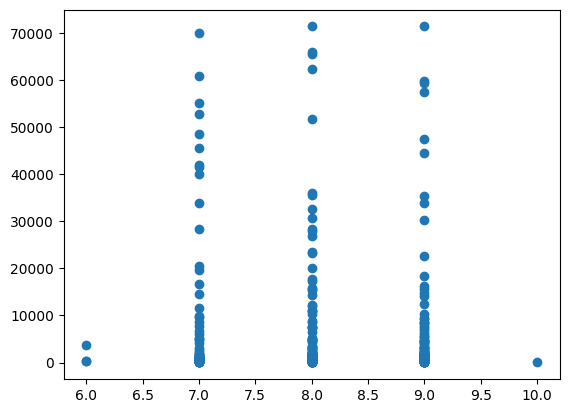

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data_rt['movie_rating'],data_rt['PeopleVote'])


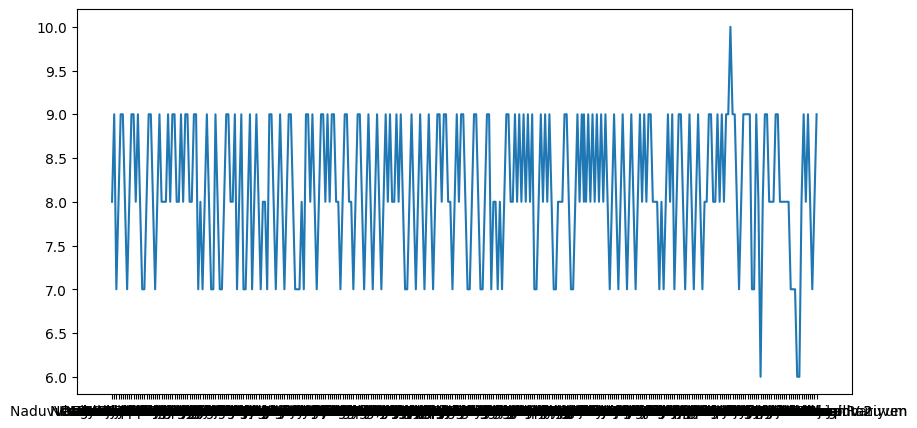

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data_rate['MovieName'],data_rate['movie_rating'])
plt.show()

In [ ]:

# create a user-item matrix
#pyvot table is multi index values
ratings_matrix = pd.pivot_table(movies, values='PeopleVote', index=['MovieName'], columns=['Actor'])

# fill the missing values with zeros if the missing values sholud be there
ratings_matrix.fillna(0, inplace=True)

# calculate the cosine similarity between movies
movie_similarity = cosine_similarity(ratings_matrix)


In [ ]:

# create a function to recommend movies based on user input
def recommend(movie_name, similarity_matrix, movies):
    movie_index = movies[movies['MovieName'] == movie_name].index[0]
    similarity_scores = list(enumerate(similarity_matrix[movie_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:10]
    movie_indices = [i[0] for i in similarity_scores]
    recommended_movies = movies.iloc[movie_indices][['MovieName', 'Genre', 'Rating', 'Director', 'Actor', 'PeopleVote', 'Year', 'Hero_Rating', 'movie_rating', 'content_rating']]
    recommended_movie_names = recommended_movies['MovieName']
    return recommended_movie_names 

In [ ]:

# example usage
selected_movie = 'Mankatha'
recommended_movie_names = recommend(selected_movie, movie_similarity, movies)
print('Recommended movies for', selected_movie)
for name in recommended_movie_names:
    print(name)


Recommended movies for Mankatha
Enakku Vaaitha Adimaigal
Aruvi
Kalavu Thozhirchalai
Nibunan
Vada Chennai
Mouna Guru
7 Aum Arivu
Vaagai Sooda Vaa
Kanchana: Muni 2


In [ ]:
import pickle

In [ ]:
pickle.dump(movies,open('movie_ls.pkl','wb'))
pickle.dump(movie_similarity,open('movie_sim.pkl','wb'))

In [ ]:
#application code
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load saved data
with open('movie_ls.pkl', 'rb') as f:
    movies = pickle.load(f)

with open('movie_sim.pkl', 'rb') as f:
    movie_similarity = pickle.load(f)

# Define recommend function
def recommend(selected_movie, movie_similarity, movies):
    # Get index of selected movie
    idx = movies.index[movies['MovieName'] == selected_movie][0]

    # Get similarity scores of all movies compared to selected movie
    sim_scores = list(enumerate(movie_similarity[idx]))

    # Sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top 10 most similar movies
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]

    # Return recommended movie names and posters
    recommended_movie_names = list(movies.iloc[movie_indices]['MovieName'])
 
    return recommended_movie_names

# Define Streamlit app
st.title('Tamil Movie Recommender System')
st.markdown(page_bg_img, unsafe_allow_html=True)

# Sidebar - Movie selection
selected_movie = st.sidebar.selectbox('Select a movie:', movies['MovieName'].values)

# Main content
if st.button('Recommend'):
    # Get recommended movies
    recommended_movie_names = recommend(selected_movie, movie_similarity, movies)

    # Show recommended movies
    for i in range(len(recommended_movie_names)):
        st.subheader(recommended_movie_names[i])

  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2023-04-16 10:35:20.321 
  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [ ]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=fc406b3567e3449bb4c5f889e153e6464fc7df0dc7f13e888dcc7c2ae1c7db1e
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators
